In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

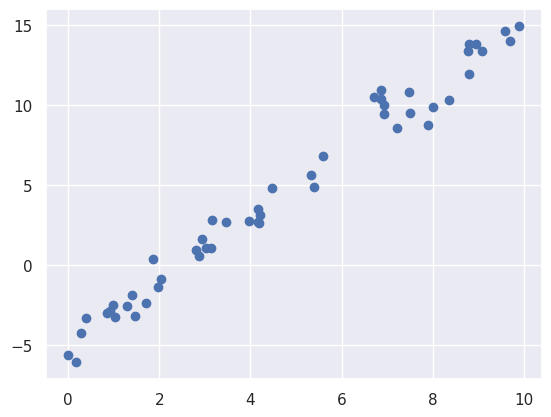

In [3]:
equation = np.random.RandomState(1)
x = 10 * equation.rand(50)
y = 2 * x - 5 + equation.randn(50)
plt.scatter(x, y)

Model slope :  [2.02720881]
Model Intercept : -4.998577085553204


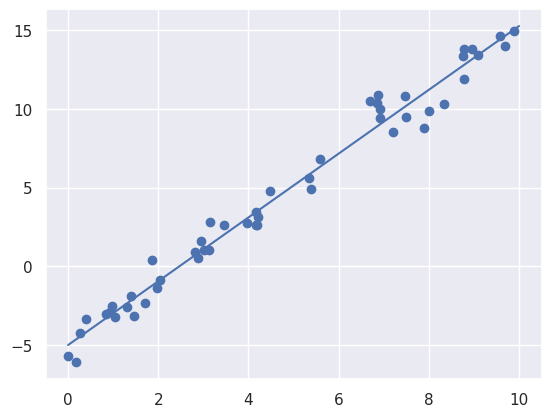

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope : ", model.coef_)
print("Model Intercept :", model.intercept_)

In [5]:
equation = np.random.RandomState(1)
X = 10 * equation.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

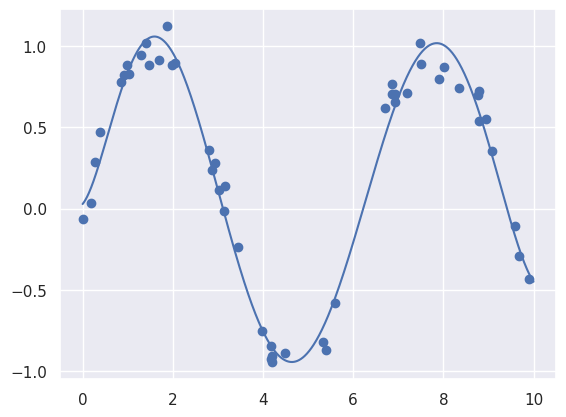

In [8]:
equation = np.random.RandomState(1)
x = 10 * equation.rand(50)
y = np.sin(x) + 0.1 * equation.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)




(0.0, 10.0)

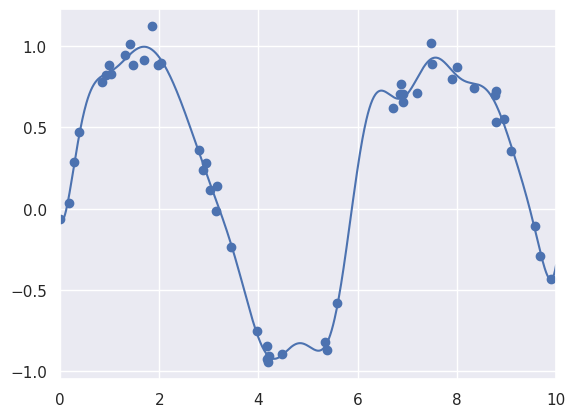

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  def __init__(self, N, width_factor = 2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basic(x, y, width, axis = None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y = None):
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self

  def transform(self, X):
    return self._gauss_basic(X[:, :, np.newaxis], self.centers_, self.width_, axis =1)



gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)


(-1.5, 1.5)

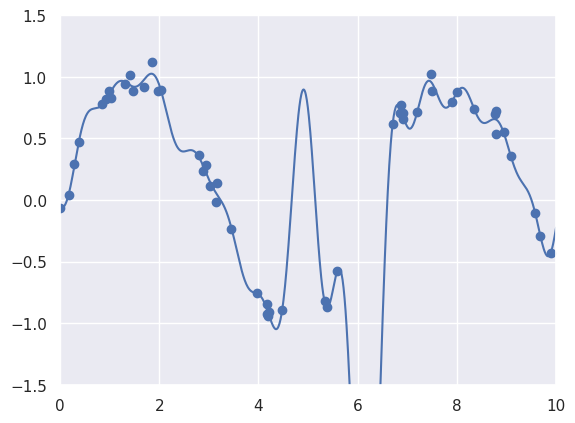

In [10]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)



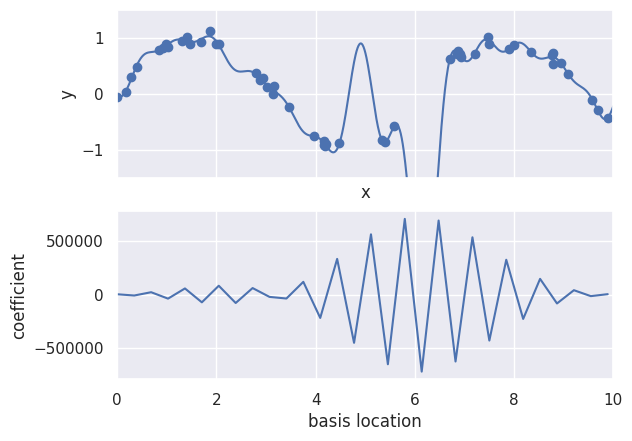

In [11]:
def basis_plot(model, title = None):
  fig, ax = plt.subplots(2, sharex = True)
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5, 1.5))

  if title:
    ax[0].set_title(title)

  ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
  ax[1].set(xlabel = 'basis location',
            ylabel = 'coefficient',
            xlim = (0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

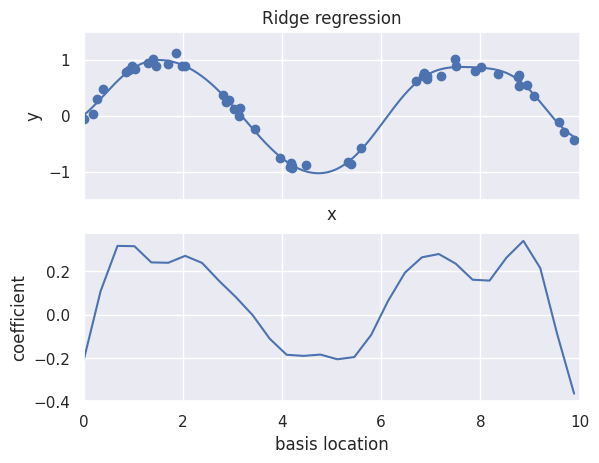

In [12]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title = "Ridge regression")


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_excel('dataset-Covid.xlsx')
df.head()


,Date,Suspect
0,2021-06-24,157
1,2021-06-25,163
2,2021-06-26,139
3,2021-06-27,89
4,2021-06-28,145


In [16]:
df.isnull().sum()

,0
Date,0
Suspect,0


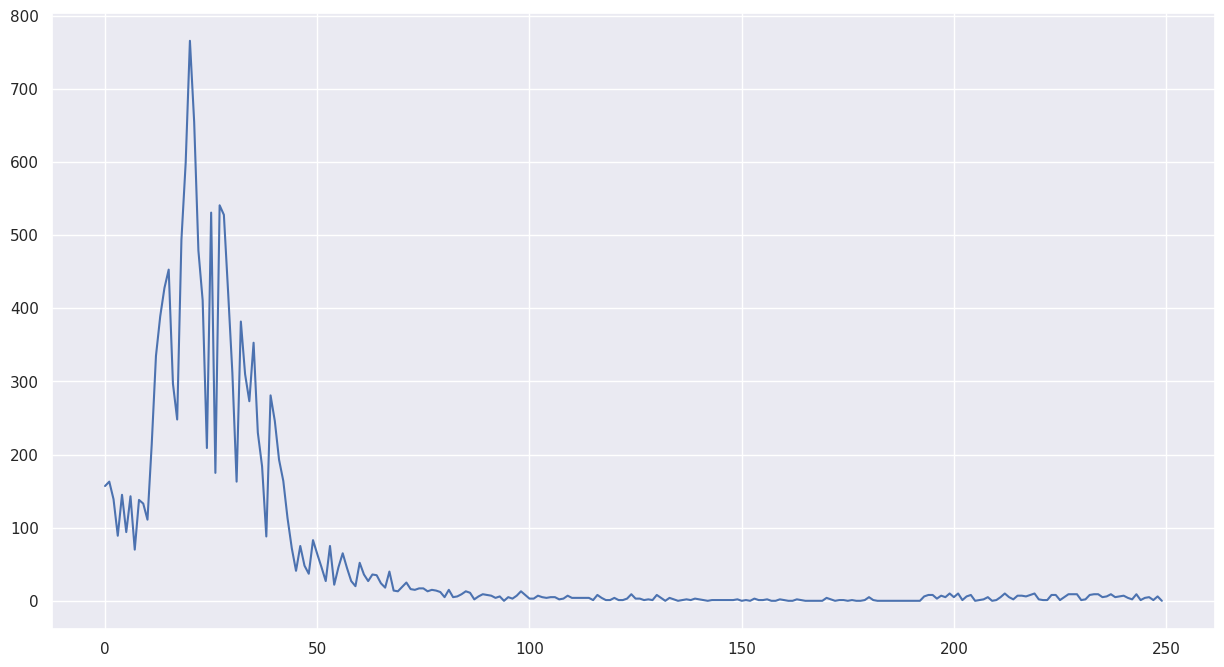

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(df['Suspect'])
plt.show()

In [18]:
df['Date'] = df.index
df['Date'] = df[('Date')].values.astype("float64")

<Axes: >

<Figure size 1500x800 with 0 Axes>

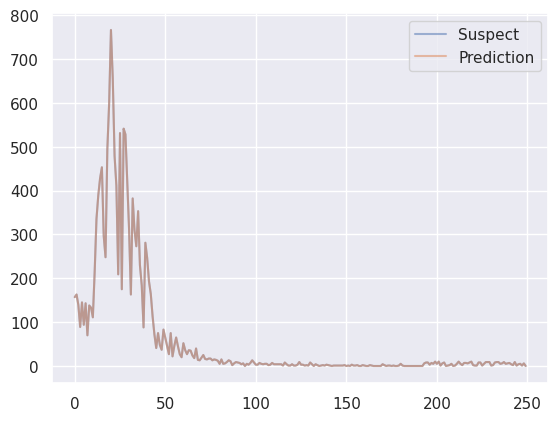

In [19]:
column = ['Date', 'Suspect']
x = df[column]
y = df['Suspect']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

model = LinearRegression(fit_intercept= False)
model.fit(x, y)
df['Prediction'] = model.predict(x)

plt.figure(figsize=(15, 8))
df[['Suspect', 'Prediction' ]].plot(alpha=0.5)


In [20]:
params = pd.Series(model.coef_, index = x.columns)
params

,0
Date,-1.838732e-16
Suspect,1.000000e+00


In [21]:
print("Model slope: ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

Model slope:  -1.8387319860914517e-16
Model Intercept:  0.0


In [29]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator =  ridge, param_grid =  params, scoring = 'neg_mean_absolute_error', cv = folds, return_train_score= True, verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002856,0.000326,0.001604,0.000050,0.0001,{'alpha': 0.0001},-3.992235e-09,-5.723613e-09,-3.158435e-09,-2.977636e-09,...,-4.081039e-09,9.997639e-10,1,-3.767863e-09,-4.440142e-09,-3.767453e-09,-3.717759e-09,-4.028510e-09,-3.944346e-09,2.708047e-10
1,0.002752,0.000253,0.001600,0.000051,0.0010,{'alpha': 0.001},-3.992386e-08,-5.723671e-08,-3.158467e-08,-2.977538e-08,...,-4.081074e-08,9.997991e-09,2,-3.768008e-08,-4.440191e-08,-3.767473e-08,-3.717652e-08,-4.028538e-08,-3.944372e-08,2.708211e-09
2,0.002652,0.000044,0.001626,0.000080,0.0100,{'alpha': 0.01},-3.992402e-07,-5.723679e-07,-3.158470e-07,-2.977529e-07,...,-4.081077e-07,9.998028e-08,3,-3.768024e-07,-4.440198e-07,-3.767475e-07,-3.717642e-07,-4.028539e-07,-3.944375e-07,2.708227e-08
3,0.002579,0.000033,0.001574,0.000085,0.0500,{'alpha': 0.05},-1.996201e-06,-2.861839e-06,-1.579235e-06,-1.488764e-06,...,-2.040539e-06,4.999015e-07,4,-1.884013e-06,-2.220099e-06,-1.883737e-06,-1.858821e-06,-2.014270e-06,-1.972188e-06,1.354114e-07
4,0.002789,0.000230,0.001508,0.000012,0.1000,{'alpha': 0.1},-3.992403e-06,-5.723678e-06,-3.158470e-06,-2.977528e-06,...,-4.081077e-06,9.998029e-07,5,-3.768025e-06,-4.440197e-06,-3.767475e-06,-3.717641e-06,-4.028539e-06,-3.944375e-06,2.708228e-07


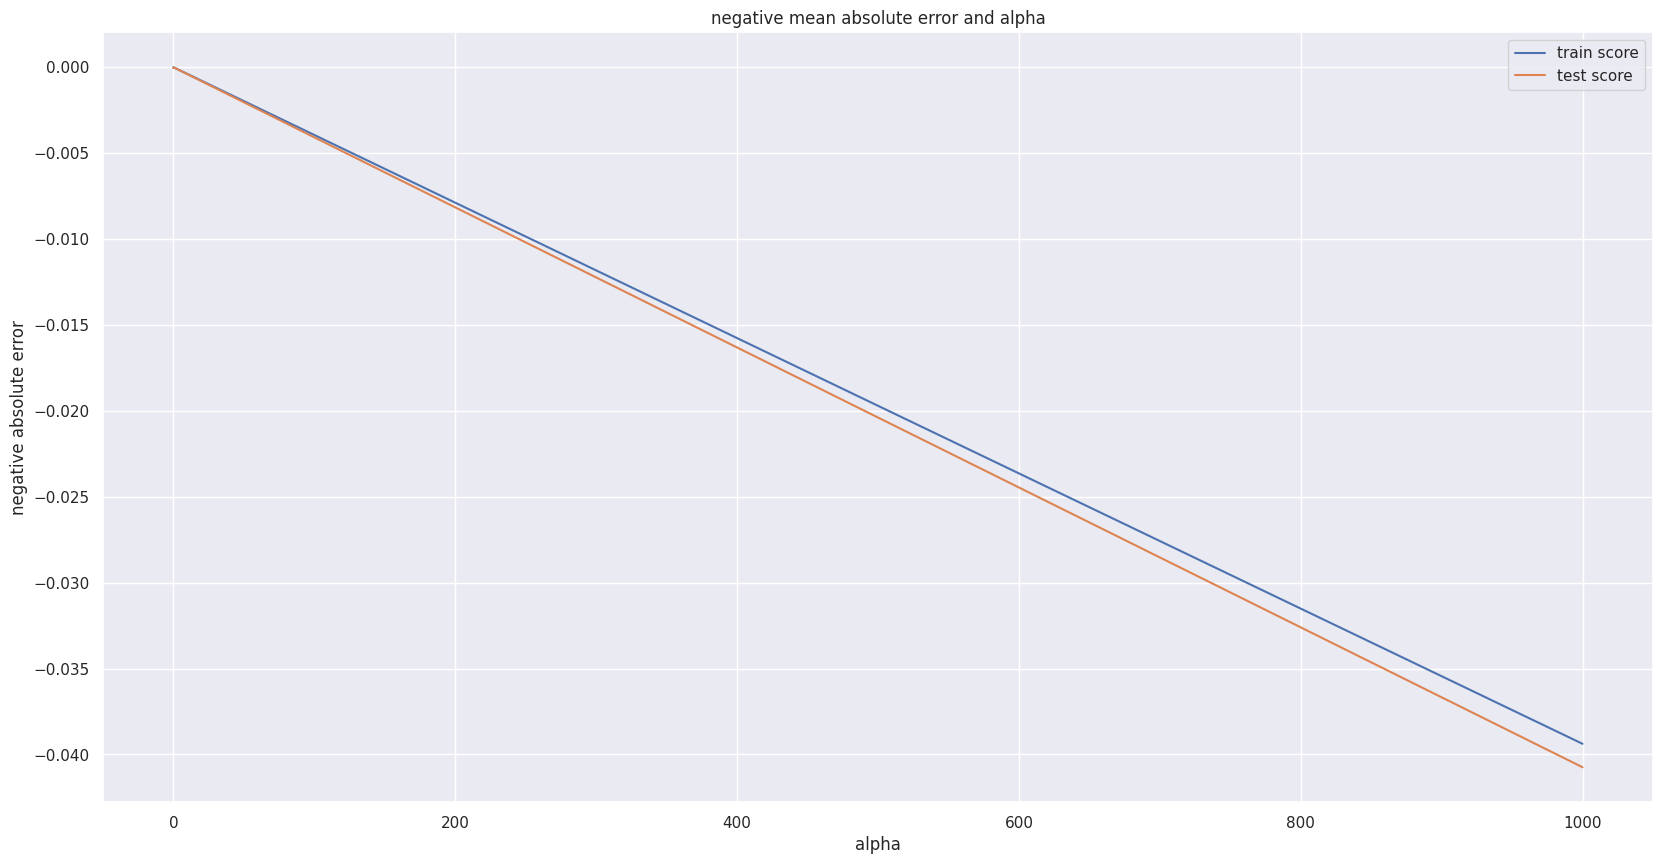

In [31]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid(True)
plt.xlabel("alpha")
plt.ylabel("negative absolute error")
plt.title("negative mean absolute error and alpha")
plt.legend(['train score', 'test score'], loc= 'upper right')


<Figure size 2000x1000 with 0 Axes>

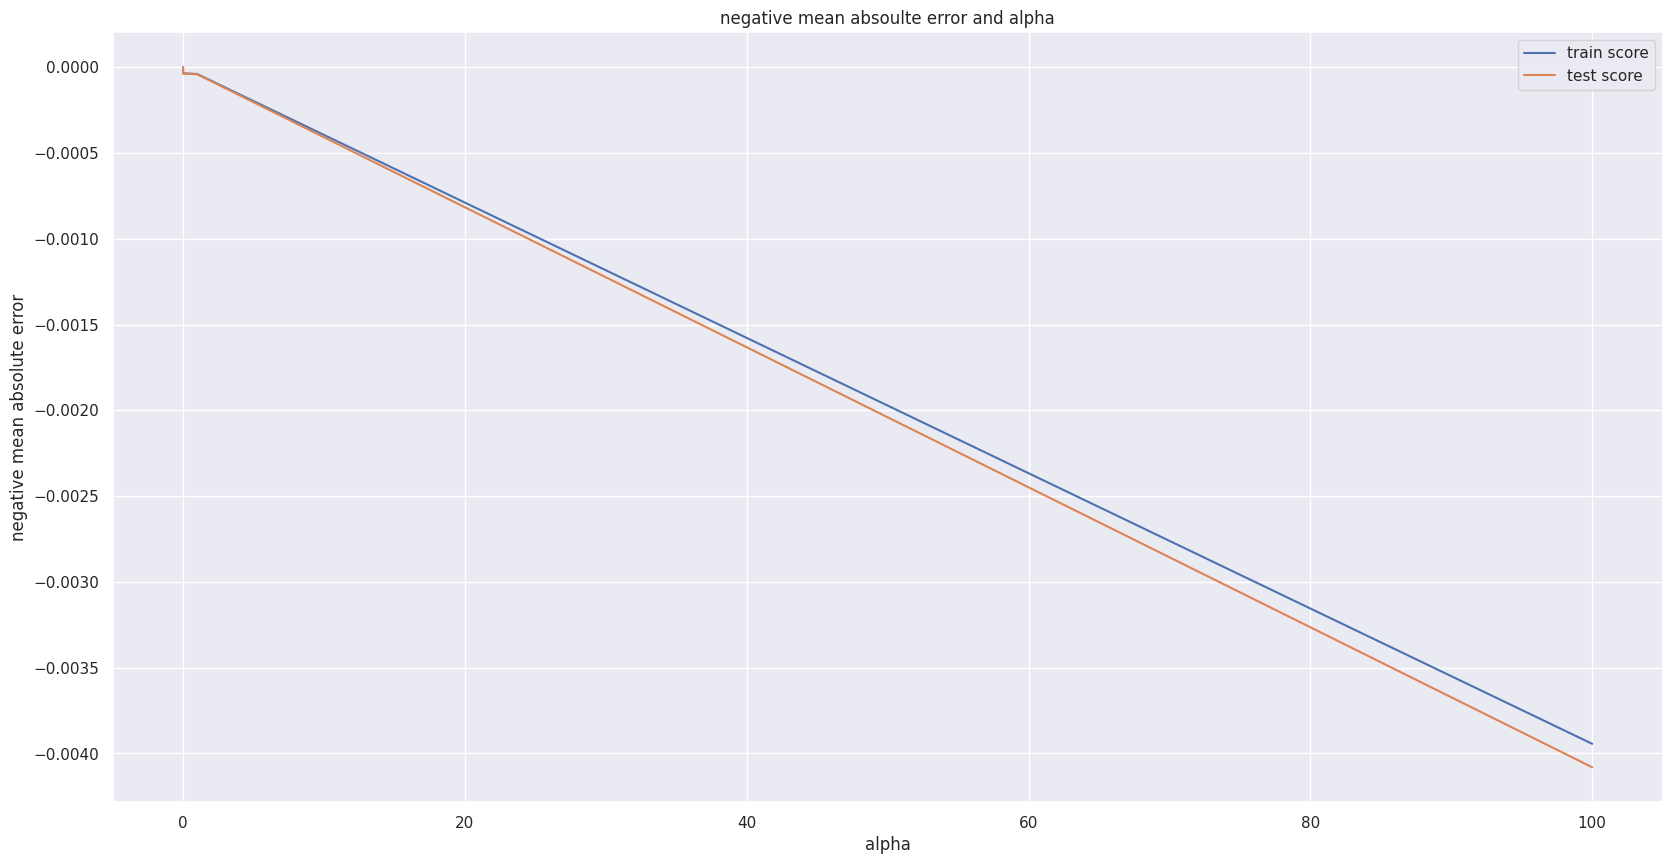

In [32]:
cv_results = cv_results[cv_results['param_alpha'] <= 200]

cv_results['param_alpha']  = cv_results['param_alpha'].astype('int')

plt.figure(figsize = (20, 10))
plt.figure(figsize = (20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid(True)
plt.xlabel('alpha')
plt.ylabel('negative mean absolute error')
plt.title('negative mean absoulte error and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()


In [33]:
alpha = 15
ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)
ridge.coef_


array([-6.64007019e-06,  9.99993941e-01])

In [34]:
imp_ridge = pd.DataFrame({
    "Varname" : x.columns,
    "Coefficient" : ridge.coef_
})
imp_ridge.sort_values(by = "Coefficient", ascending = False)

,Varname,Coefficient
1,Suspect,0.999994
0,Date,-0.000007


In [35]:
y_pred = ridge.predict(x_test)

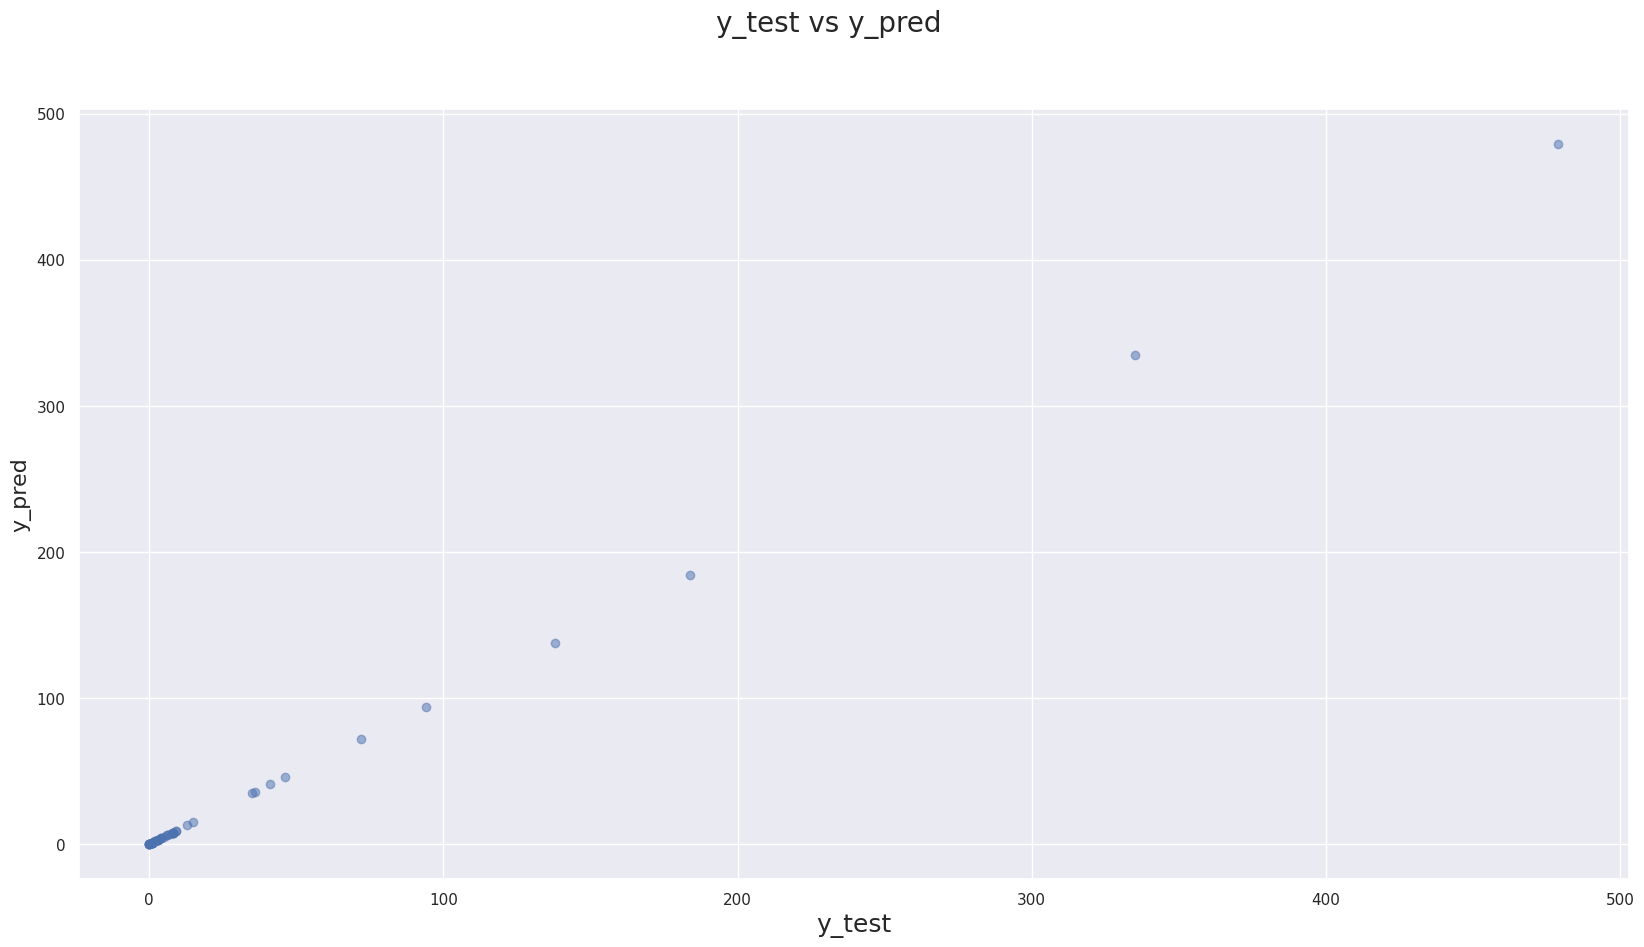

In [36]:
fig = plt.figure(figsize = (20, 10))
plt.scatter(y_test, y_pred, alpha = .5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [37]:
df = pd.DataFrame({
    'Actual' : y_test,
    'Predictions' : y_pred
})
df['Predictions'] = round(df['Predictions'], 2)
df

,Actual,Predictions
225,1,1.0
122,1,1.0
92,4,4.0
157,0,0.0
154,1,1.0
161,0,0.0
198,5,5.0
83,6,6.0
63,36,36.0
155,1,1.0


In [38]:
metrics.explained_variance_score(y_test, y_pred)

0.9999999999730012

In [39]:
metrics.mean_absolute_error(y_test, y_pred)

0.0003913572932135273

In [40]:
metrics.max_error(y_test, y_pred)

np.float64(0.001824640732138505)

In [41]:
metrics.mean_squared_error(y_test, y_pred)

2.3769500035647134e-07

In [42]:
metrics.r2_score(y_test, y_pred)

0.9999999999673318

In [43]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = [1, 10, 100]

lasso_gscv = GridSearchCV(estimator=Lasso(),
                          param_grid = {'alpha': alpha,
                                        'max_iter' : max_iter},
                          scoring = 'neg_mean_absolute_error',
                          cv = 5,
                          refit = False)

In [45]:
lasso_gscv.fit(x, y)
lasso_gscv.best_params_

{'alpha': 0.0001, 'max_iter': 100}

In [46]:
lasso = Lasso(alpha = lasso_gscv.best_params_['alpha'], max_iter = lasso_gscv.best_params_['max_iter'])
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=100)

In [47]:
print("Training set score : {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score : {:.2f}".format(lasso.score(x_test, y_test)))

Training set score : 1.00
Test set score : 1.00


In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35,11], [45, 15], [55, 34], [60, 35]]
y = [3, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [49]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 3  5 20 14 32 22 38 43]


In [50]:
model = LinearRegression().fit(x, y)

r_sq  = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept: ', model.intercept_)
print('slope : ', model.coef_)


coefficient of determination: 0.8623516586227723
intercept:  5.0200311438278575
slope :  [0.47161665 0.22742072]


In [53]:
y_pred = model.predict(x)
print('predicted response', y_pred, sep='\n')

predicted response
[ 5.24745187  7.60553511 12.54912231 17.94755096 24.02824179 29.65409117
 38.69125142 41.27675538]


In [54]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis = 1)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[ 5.24745187  7.60553511 12.54912231 17.94755096 24.02824179 29.65409117
 38.69125142 41.27675538]


In [55]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [56]:
y_new = model.predict(x_new)
print(y_new)

[ 5.24745187  6.64552661  8.04360136  9.4416761  10.83975085]


In [57]:
import numpy as np
import statsmodels.api as sm
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [58]:
x = sm.add_constant(x)

print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [59]:
model = sm.OLS(y, x)

results = model.fit()


In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 17 Sep 2025   Prob (F-statistic):            0.00713
Time:                        10:07:10   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [62]:
print('coefficient of determination: ', results.rsquared)
print('adjusted coefficient of determination: ', results.rsquared_adj)
print('regression coefficients: ', results.params)

coefficient of determination:  0.8615939258756776
adjusted coefficient of determination:  0.8062314962259487
regression coefficients:  [5.52257928 0.44706965 0.25502548]


In [63]:
print('predicted response: ', results.fittedvalues, sep = '\n')
print('predicted response: ', results.predict(x), sep = '\n')


predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response: 
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [64]:
x_new = sm.add_constant(np.arange(10).reshape(-1, 2))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


In [65]:
y_new = results.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


# Logistic regression

In [100]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [101]:
data = pd.read_csv("bank.csv", header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [102]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [103]:
data['education'].unique()


array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [104]:
data['education'] =np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.12y', 'Basic', data['education'])

data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school', 'Basic',
       'professional.course', 'illiterate'], dtype=object)

In [105]:
data['y'].value_counts()

,count
y,
0,36548
1,4640


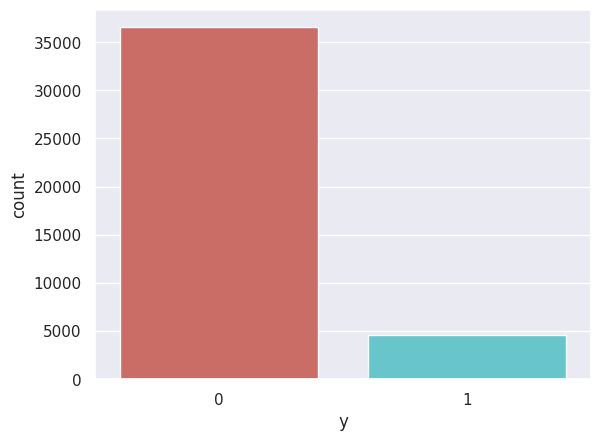

<Figure size 640x480 with 0 Axes>

In [106]:
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()
plt.savefig('count_plot')


In [107]:
count_no_sub = len(data[data['y'] == 0])
count_sub  = len(data[data['y'] == 1])
pct_of_no_sub  = count_no_sub / (count_no_sub + count_sub)
print("percentage of no subscription is", pct_of_no_sub * 100)
pct_of_sub = count_sub / (count_no_sub + count_sub)

print("Percentage of subscription", pct_of_sub * 100)

percentage of no subscription is 88.73458288821988
Percentage of subscription 11.265417111780131


In [108]:
data.groupby('y').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [109]:
data.groupby('job').mean(numeric_only= True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [110]:
data.groupby('marital').mean(numeric_only= True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [111]:
data.groupby('education').mean(numeric_only= True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,39.442725,262.150294,2.538923,979.472712,0.138059,0.179009,93.630729,-41.272076,3.718576,5172.960429,0.079285
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


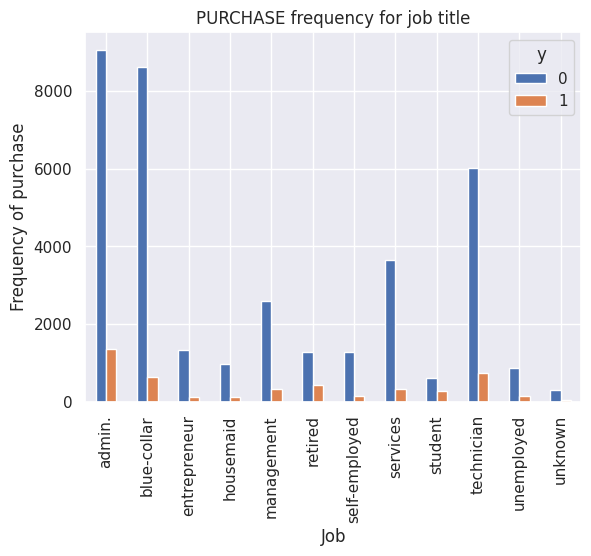

In [112]:
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('PURCHASE frequency for job title')
plt.xlabel("Job")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_fre_job")

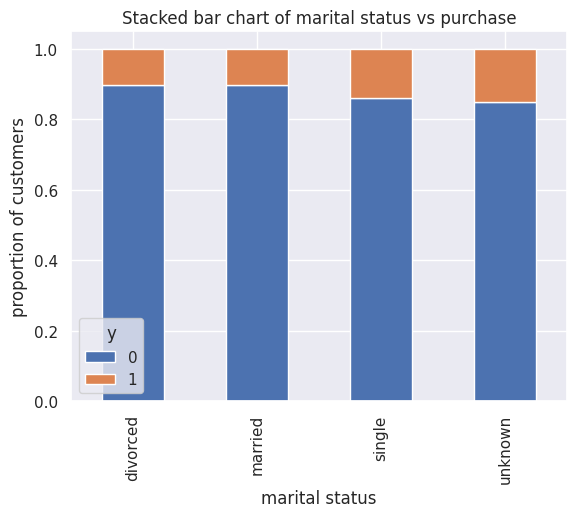

In [113]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Stacked bar chart of marital status vs purchase')
plt.xlabel('marital status')
plt.ylabel('proportion of customers')
plt.savefig('marital_vs_pur_stack')

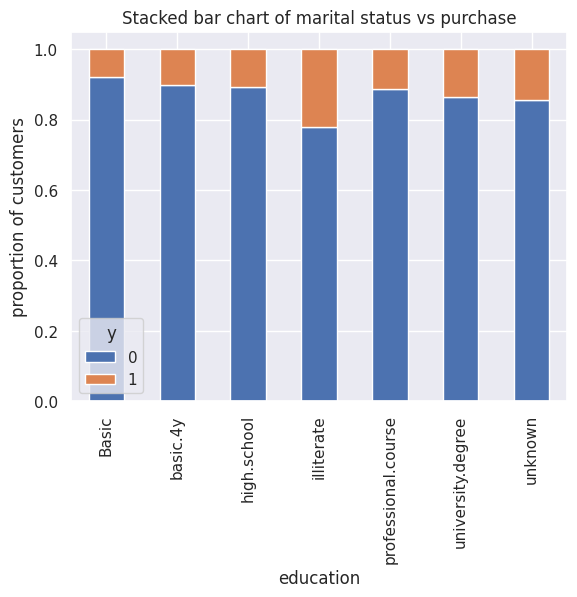

In [114]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Stacked bar chart of marital status vs purchase')
plt.xlabel('education')
plt.ylabel('proportion of customers')
plt.savefig('edu_vs_pur_stack')

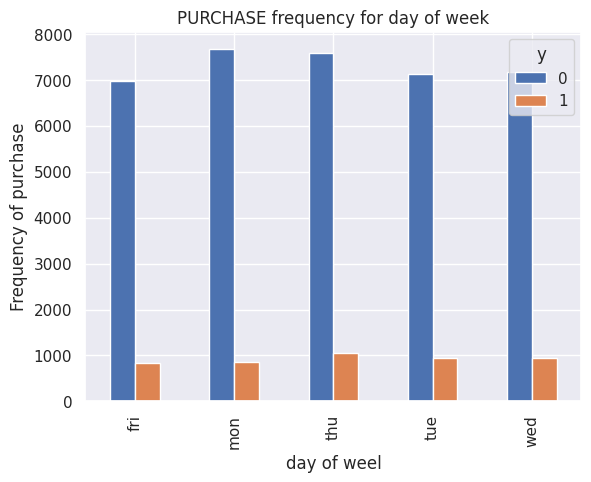

In [115]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('PURCHASE frequency for day of week')
plt.xlabel("day of weel")
plt.ylabel("Frequency of purchase")
plt.savefig("pre_dayofweek_bar")

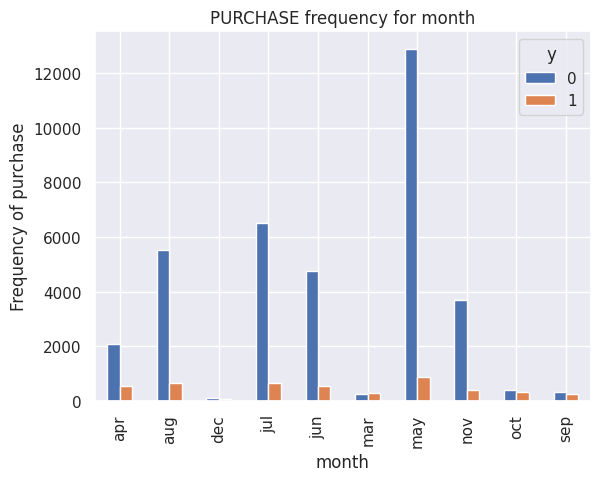

In [116]:
pd.crosstab(data.month, data.y).plot(kind='bar')
plt.title('PURCHASE frequency for month')
plt.xlabel("month")
plt.ylabel("Frequency of purchase")
plt.savefig("pur_fre_month_bar")

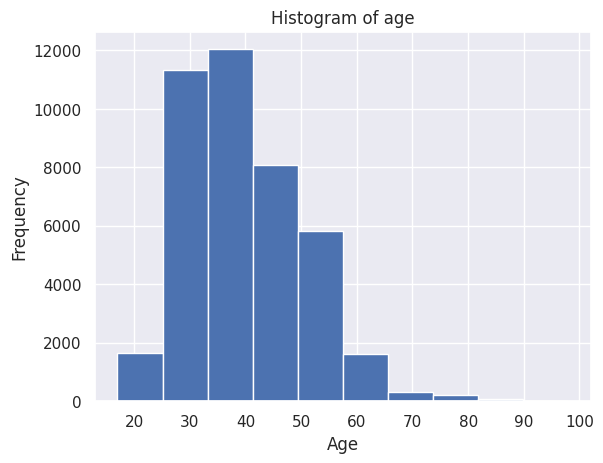

In [117]:
data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


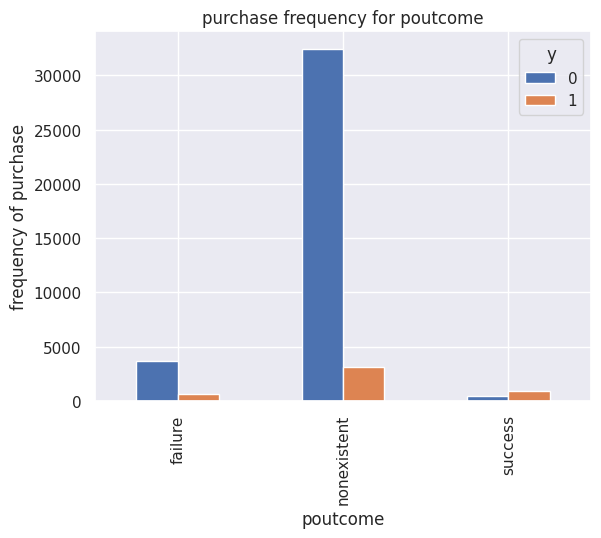

In [118]:
pd.crosstab(data.poutcome, data.y).plot(kind = 'bar')
plt.title("purchase frequency for poutcome")
plt.xlabel("poutcome")
plt.ylabel("frequency of purchase")
plt.savefig('pur_fre_pout_bar')


In [119]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
  cat_list = 'var' + '_' + var
  cat_list = pd.get_dummies(data[var], prefix = var)
  data1 = data.join(cat_list)
  data = data1
cat_vars =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [120]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_basic.4y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'm

In [126]:
X = data_final.loc[:, data_final.columns !=  'y']
y = data_final.loc[:, data_final.columns ==  'y']

In [128]:
import statsmodels.api as sm


X = X.astype(int)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.208755
         Iterations: 35


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         Results: Logit
Model:                         Logit                      Method:                     MLE       
Dependent Variable:            y                          Pseudo R-squared:           0.407     
Date:                          2025-09-17 11:00           AIC:                        17300.3668
No. Observations:              41188                      BIC:                        17748.9137
Df Model:                      51                         Log-Likelihood:             -8598.2   
Df Residuals:                  41136                      LL-Null:                    -14499.   
Converged:                     0.0000                     LLR p-value:                0.0000    
No. Iterations:                35.0000                    Scale:                      1.0000    
------------------------------------------------------------------------------------------------
                               Coef.     Std.Err.      z     P>|z|     

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [130]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistics regression classifier on test set {:.2f}".format(logreg.score(X_test, y_test)))


Accuracy of logistics regression classifier on test set 0.91


In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10702   279]
 [  806   570]]


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10981
           1       0.67      0.41      0.51      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

